Exercicis d'algoritmes de Classificació.

# Importaciones y datos

In [80]:
import pandas as pd

In [143]:
print(open('wineNames.txt').read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [82]:
caracteristicas = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
         "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
         "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

wines = pd.read_csv('wineData.txt', sep=',', encoding='utf-8', names=caracteristicas)

# Limpieza de datos

Empezaremos inspeccionando y limpiando los datos si es necesario ...

In [144]:
wines.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [145]:
wines.tail()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


En head y tail no observamos anomalías ...

In [146]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

... tampoco hay valores nulos en ninguna columna, y todos los datos son de tipo numérico ...

In [147]:
wines.duplicated().sum()

0

No hay filas duplicadas.

In [148]:
wines.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Viendo los parámetros de centralización y dispersión tampoco observamos valores demasiado extremos.

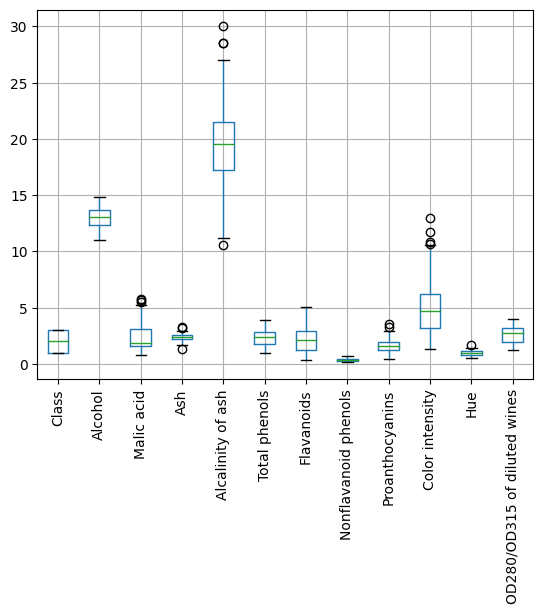

In [149]:
import matplotlib.pyplot as plt

wines.drop(['Proline', 'Magnesium'], axis=1).boxplot()
plt.xticks(rotation=90)
plt.show()

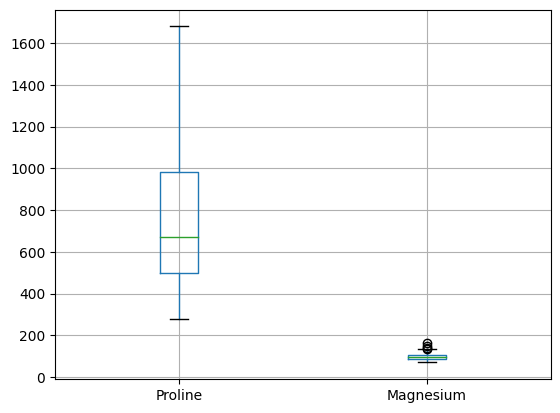

In [150]:
wines[['Proline', 'Magnesium']].boxplot()
plt.show()

Gráficamente comprobamos como sí hay algunos valores extremos, pero de nuevo, no tanto como para tenerlos que descartar (porque puedan significar un error en la recogida de datos).

# EX01. Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

# Modelo 1: árbol de decisión

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [97]:
X = wines[caracteristicas].drop('Class', axis=1)
y = wines.Class

Separamos el dataframe en las variables independientes X - matriz - (caracteristicas) y la variable dependiente y - vector - (Class).

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Separamos los datos, con una proporción 70 - 30 (entrenamiento - test). Random_state = 1 hace que cada vez que entrenemos los datos se utilicen los mismos para entrenamiento y los mismos para test (podría tomar cualquier otro valor entero positivo).

In [130]:
clf_tree = DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

Ajustamos el modelo a los datos de entrenamiento.

In [131]:
y_tree = clf_tree.predict(X_test)
y_tree

array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 2, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       3, 1, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 3, 3, 1,
       1, 1, 2, 1, 1, 1, 2, 3, 3, 1])

Obtenemos las predicciones para y de acuerdo con el modelo y los datos de entrenamiento de X. Esto nos servirá después para calcular el nivel de precisión del modelo con respecto de los datos test.

# Modelo 2: KNN

De manera similar, repetimos el proceso para el *algoritmo de los vecinos cercanos* (KNN), que nos permite inferir la variable dependiente en base a las muestras disponibles más cercanas.

In [107]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN = KNeighborsClassifier()
clf_KNN.fit(X_train, y_train)

KNeighborsClassifier()

Ajustamos el modelo KNN a los datos de entrenamiento (X_train e y_train).

In [108]:
y_KNN = clf_KNN.predict(X_test)
y_KNN

array([2, 2, 3, 3, 1, 2, 3, 1, 3, 2, 1, 3, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2,
       3, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 1, 1, 2, 3, 1,
       1, 1, 1, 1, 1, 1, 2, 3, 3, 1])

... y obtenemos la predicción de clases para el subconjunto test con el modelo KNN.

# EX02. Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

Ahora tenemos las predicciones hechas por los dos modelos guardadas en y_tree y en y_KNN, mientras y_test no varía, con lo cual nos tiene que resultar sencillo calcular el rendimiento de ambos modelos utilizando la precisión, las matrices de confusión ...

In [132]:
print("Precisión:", metrics.accuracy_score(y_test, y_tree))

Precisión: 0.9444444444444444


Obtenemos la precisión para el primer modelo (decision tree).

In [111]:
print("Precisión:", metrics.accuracy_score(y_test, y_KNN))

Precisión: 0.7037037037037037


... y para el segundo modelo (KNN).

Accuracy = (TP + TN) / (TP + TN + FP + FN)

El significado de la precisión (Accuracy) son el número de clasificaciones acertadas (true positives + true negatives), dentro del total de clasificaciones hechas (TP + TN + false positives + false negatives) entre las tres clases.

Por lo tanto 0.94 significa, de cada 100 predicciones que hace decision tree para una determinada clase, teniendo en cuenta los valores incluidos y excluidos, 94 son aciertos.

Vemos como la precisión del modelo árbol de decisión es más alta que la de KNN con los datos originales.

Esto se puede deber a la mayor sensibilidad a la escala del modelo KNN, lo que comprobaremos más adelante.

In [22]:
from sklearn.metrics import confusion_matrix

In [112]:
confusion_matrix(y_test, y_tree)

array([[22,  1,  0],
       [ 0, 18,  1],
       [ 0,  0, 12]])

Aquí la matriz de confusión para el primer modelo, siempre en orden: clase 1 - clase 2 - clase 3. Por lo tanto en la diagonal el número de valores correctamente clasificados para el subconjunto test, en las clases 1 - 2 - 3, y fuera de ella los que no, el orden es filas - columnas, por lo tanto: primera fila segunda columna, valores que pertenecían a la primera clase pero se han clasificado de manera equivocada en la segunda; y primera columna - segunda fila serían los que se han clasificado en la primera clase pero pertenecían a la segunda.

In [113]:
confusion_matrix(y_test, y_KNN)

array([[21,  0,  2],
       [ 2, 12,  5],
       [ 0,  7,  5]])

Vemos como la matriz de confusión del modelo KNN muestra 16 predicciones incorrectas (fuera de la diagonal) del total de 54 para el subconjunto de prueba (test).

Otra medida del rendimiento es el recall (o sensibilidad): TP / (TP + FN), que nos dice del total que pertenecían a cada clase, cuántos ha clasificado correctamente en la clase correspondiente el modelo.



In [114]:
from sklearn.metrics import recall_score

print(recall_score(y_test, y_tree, average='macro'))
print(recall_score(y_test, y_KNN, average='macro'))

0.9679633867276888
0.653763030765319


Al indicar average=macro estamos teniendo en cuenta el total de 'aciertos' y 'errores' entre las tres clases, sin ponderar.
De nuevo, la interpretación es muy parecida, del total que pertenecían a cada clase el modelo ha predicho correctamente el 96% y el 65% respectivamente (para los modelos de árbol y KNN).

Promediando las dos medidas anteriores tenemos el f1 score, la fórmula es: 2 x (Precision+Recall)/(PrecisionxRecall)

In [115]:
from sklearn.metrics import f1_score

In [116]:
print(f1_score(y_test, y_tree, average='macro'))
f1_score(y_test, y_KNN, average='macro')

0.9617153996101364


0.653763030765319

En este caso observamos como los resultados son prácticamente idénticos. La interpretación en este caso sería: cuán acertado es el modelo teniendo en cuenta tanto precisión (predicciones correctas del total) como sensibilidad (cuánto no se ha dejado fuera si nos centramos en las 'positivas').

# EX03. Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

In [124]:
clf_tree_A = DecisionTreeClassifier(max_depth=5, criterion='gini', splitter='random')
clf_tree_A = clf_tree_A.fit(X_train, y_train)

In [126]:
clf_tree_B = DecisionTreeClassifier(max_depth=5, criterion='entropy', splitter='best')
clf_tree_B = clf_tree_B.fit(X_train, y_train)

In [127]:
clf_tree_C = DecisionTreeClassifier(max_depth=3, criterion='entropy', splitter='best')
clf_tree_C = clf_tree_C.fit(X_train, y_train)

Entrenamos a los datos con el modelo de árbol cambiando los parámetros criterion, splitter y max_depth.

Ahora vamos con el modelo KNN, donde el parámetro principal es el número de vecinos (n_neighbors) que se toman para aproximar las predicciones de y, siendo el valor máximo posible 178 * 0.7 = 124, que es el número de observaciones del subconjunto de entrenamiento.

In [120]:
f1s = []
max = 0
min = 0

for i in range(1, 124):
    clf_KNN_A = KNeighborsClassifier(n_neighbors=i)
    clf_KNN_A.fit(X_train, y_train)
    y_KNN_A = clf_KNN_A.predict(X_test)
    f1s.append(f1_score(y_test, y_KNN_A, average='macro'))
    if f1s[-1] > f1s[max]:
      max = i - 1
    if f1s[-1] < f1s[min]:
      min = i - 1

Recorremos f1_score para todos los posibles valores de k_neighbors, el rendimiento máximo lo obtenemos cuando k = 1, con f1 de 0.98. El mínimo en k=101, con una f1 de 0.17.

# EX04. Compara el seu rendiment fent servir l’aproximació train/test o cross-validation.

In [125]:
y_tree_A = clf_tree_A.predict(X_test)
f1_score(y_test, y_tree_A, average='macro')

0.9068314726209463

In [128]:
y_tree_B = clf_tree_B.predict(X_test)
f1_score(y_test, y_tree_B, average='macro')

0.9608711881461285

In [129]:
y_tree_C = clf_tree_C.predict(X_test)
f1_score(y_test, y_tree_C, average='macro')

0.9679633867276888

Mostramos los rendimientos respectivos del modelo árbol de decisión, viendo como el rendimiento, que estaba en el 94%, aunque ligeramente superior con los parámetros de las versiones B y C, es parecido. El ajuste original ya era alto, por lo tanto con poco margen para superarlo. Recordemos que f1 hay que interpretarlo como una combinación de precisión y sensibilidad, de alguna manera mide la exactitud de la predicción siguiendo dos criterios ligeramente distintos (desde el total de predicciones positivas y negativas acertadas y desde el total de positivas acertadas respectivamente).

Vamos con el rendimiento del modelo KNN:

In [133]:
print('Mínimo')
print(min+1)
print(f1s[min])
print('Máximo')
print(max+1)
print(f1s[max])

Mínimo
108
0.1735159817351598
Máximo
17
0.719222430128605


Aquí podemos ver la importancia que tiene el valor del parámetro k (n_neighbors) dentro del modelo de aproximación KNN. El rendimiento máximo f1 lo obtenemos para una k = 17, siendo del 72%, y el mínimo para una k de 108, con un rendimiento del 17%. Esto significa aproximadamente que de cada 100 predicciones que hace el modelo 72 son acertadas, o 17 son acertadas, teniendo el doble de peso clasificar dentro de la clase correcta que no clasificar en otras clases las observaciones que pertenecen a otras clases.

# EX05. Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...).

En este caso vamos a utilizar la estandarización, utilizando StandardScaler de sklearn.

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Vamos ahora a repetir el proceso de entrenamiento y predicción para los dos modelos en su versión óptima y ver si obtenemos un aumento del rendimiento.

In [77]:
classifier_scaled_tree = DecisionTreeClassifier(max_depth=3, criterion='entropy', splitter='best')
classifier_scaled_tree = classifier_scaled_tree.fit(X_train_scaled, y_train)
y_pred_scaled_tree = classifier_scaled_tree.predict(X_test_scaled)

In [78]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
y_pred_scaled_KNN = knn.predict(X_test_scaled)

Ya tenemos los dos modelos entrenados y las predicciones para las clases guardadas en y_pred_scaled_tree e y_pred_scaled_KNN. Sólo nos queda evaluar los dos modelos optimizados.

In [135]:
from sklearn.metrics import classification_report

print('Tree:')
report_tree_scaled = classification_report(y_test, y_pred_scaled_tree)
print(report_tree_scaled)

print('KNN:')
report_KNN_scaled = classification_report(y_test, y_pred_scaled_KNN)
print(report_KNN_scaled)

Tree:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96        23
           2       0.90      0.95      0.92        19
           3       1.00      0.92      0.96        12

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.95        54
weighted avg       0.95      0.94      0.94        54

KNN:
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Aquí podemos comprobar como tras estandarizar las variables independientes en el modelo árbol de decisión el rendimiento se mantiene, mientras que el modelo KNN obtiene rendimientos muy superiores, del 98%, tanto para precision como para recall (sensibilidad) como para f1 (media entre ambas), e incluso supera al modelo del árbol de decisión en tres puntos porcentuales.

Comprobamos entonces tanto la idoneidad de cualquiera de los dos modelos y la sensibilidad del modelo KNN a la escala.

Podríamos por último hacer un test CV.

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(clf_tree_C, X, y, cv=5)
print(scores_dt)

[0.91666667 0.83333333 0.94444444 0.97142857 0.88571429]


In [141]:
scaler.fit(X)
X_scaled = scaler.transform(X)

In [142]:
clf_KNN_A17 = KNeighborsClassifier(n_neighbors=17)
scores_KNN_A17 = cross_val_score(clf_KNN_A17, X_scaled, y, cv=5)
print(scores_KNN_A17)

[0.94444444 0.94444444 0.97222222 1.         0.97142857]


Por último, mediante la realización de la validación cruzada, podemos confirmar la fiabilidad del rendimiento de ambos modelos, incluso superior en el segundo modelo, lo que en este caso señalaría a KNN como el modelo óptimo de aproximación a los datos de clasificación de los vinos de acuerdo con las 13 variables disponibles.